In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('careermitra_dataset.csv')

In [13]:
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [14]:
X = df.loc[:, ['Acedamic percentage in Operating Systems', 'percentage in Algorithms','Percentage in Programming Concepts','Percentage in Software Engineering','Percentage in Computer Networks','Percentage in Communication skills','Percentage in Mathematics','Percentage in Computer Architecture','Percentage in Electronics Subjects']]

In [15]:
X

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Communication skills,Percentage in Mathematics,Percentage in Computer Architecture,Percentage in Electronics Subjects
0,69,63,78,87,94,61,84,87,94
1,78,62,73,60,71,91,84,73,70
2,71,86,91,87,61,94,72,72,81
3,76,87,60,84,89,69,88,62,73
4,92,62,90,67,71,73,71,73,89
...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,69,84,90,74
19996,80,69,83,87,82,67,92,66,66
19997,83,70,80,87,64,88,94,69,85
19998,68,87,91,88,66,61,87,61,74


In [16]:
y = df[['Suggested Job Role']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = np.array(y_encoded, dtype=np.float32)

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
num_classes = len(np.unique(y_encoded))

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(9,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\HP\Desktop\sample_project_2\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(optimizer=Adam(learning_rate=0.1),  # Default is 0.001
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model.fit(X_train_scaled, y_encoded, 
                    epochs=20, 
                    batch_size=16, 
                    validation_split=0.2)

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0471 - loss: 3.6564 - val_accuracy: 0.0487 - val_loss: 3.5562
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0554 - loss: 3.5466 - val_accuracy: 0.0341 - val_loss: 3.5610
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0453 - loss: 3.5515 - val_accuracy: 0.0487 - val_loss: 3.5680
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0481 - loss: 3.5491 - val_accuracy: 0.0272 - val_loss: 3.5587
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0507 - loss: 3.5472 - val_accuracy: 0.0272 - val_loss: 3.5653
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0518 - loss: 3.5495 - val_accuracy: 0.0487 - val_loss: 3.5711
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0494 - loss: 3.5508 - val_accuracy: 0.0278 - val_loss: 3.5541
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0451 - loss: 3.5532 - val_accuracy: 0.

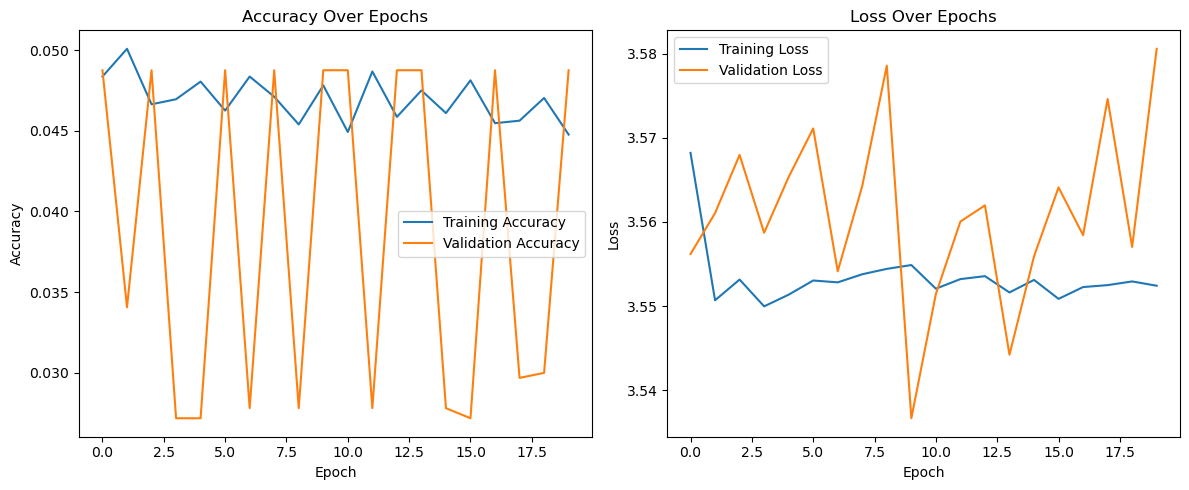

In [57]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
print("Labels min:", np.min(y_train), "max:", np.max(y_train))

Labels min: Applications Developer max: Web Developer
